# **Exploratory Data Analysis for DS 4021 Final Project**

Phishing is an internet crime, in which a website pretends to be a
legitimate enterprise to solicit sensitive information such as usernames, passwords and social
security numbers. In today’s digital age, cyberattacks and phishing attempts are increasingly
common, posing serious risks to individuals and organizations alike. Detecting phishing
websites early is essential to protecting confidential information and maintaining online security.
By analyzing specific clues and patterns, we can identify indicators that suggest whether a
website is potentially malicious. This project will use the Phishing Websites Dataset to uncover
the most significant features and predictors, aiming to build a reliable model that acts as a shield
against phishing threats and enhances cybersecurity awareness.


**Research Question:** How do we predict a website is a phishing website or not?


**Dataset Description:**

The dataset is from the UC Irvine Machine Learn Repository. It has 11055
instances and 30 features. There are three binary characters being:

Legitimate: 1

Suspicious: 0

Phishing: -1


**Importing Necessary Packages for Analysis**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

**Loading the dataset**

In [2]:
df = pd.read_csv('../Data/phishing_train.csv')

In [3]:
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,0,1,1
1,-1,-1,1,1,1,-1,0,1,1,1,...,1,1,1,1,0,-1,-1,0,1,-1
2,1,1,1,1,1,1,0,1,-1,1,...,1,1,-1,1,0,-1,-1,0,1,1
3,-1,-1,-1,-1,-1,-1,1,-1,-1,1,...,1,1,1,-1,0,-1,-1,1,1,1
4,-1,-1,1,1,1,-1,-1,-1,-1,1,...,1,1,1,1,1,-1,-1,0,1,-1


**Columns**

In [4]:
df.columns

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

**Columns containing the field suspicious**

In [5]:
suspicious_cols = [col for col in df.columns if 0 in df[col].values]

print(f" The value 0 meaning that the URL is suspicious is present in {len(suspicious_cols)} features. These columns are: {suspicious_cols}")

 The value 0 meaning that the URL is suspicious is present in 9 features. These columns are: ['URL_Length', 'having_Sub_Domain', 'SSLfinal_State', 'URL_of_Anchor', 'Links_in_tags', 'SFH', 'Redirect', 'web_traffic', 'Links_pointing_to_page']


## **Summary Statistics**


**Missing Values**

There are no missing values in the dataset

In [6]:
print(df.isnull().sum())

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

**Data Types**

All of the data types are "int64", making it extremely easy to work with all field, without changing types.


In [7]:
df.dtypes

having_IP_Address              int64
URL_Length                     int64
Shortining_Service             int64
having_At_Symbol               int64
double_slash_redirecting       int64
Prefix_Suffix                  int64
having_Sub_Domain              int64
SSLfinal_State                 int64
Domain_registeration_length    int64
Favicon                        int64
port                           int64
HTTPS_token                    int64
Request_URL                    int64
URL_of_Anchor                  int64
Links_in_tags                  int64
SFH                            int64
Submitting_to_email            int64
Abnormal_URL                   int64
Redirect                       int64
on_mouseover                   int64
RightClick                     int64
popUpWidnow                    int64
Iframe                         int64
age_of_domain                  int64
DNSRecord                      int64
web_traffic                    int64
Page_Rank                      int64
G

**Total Counts of Phishing Status By Feature**

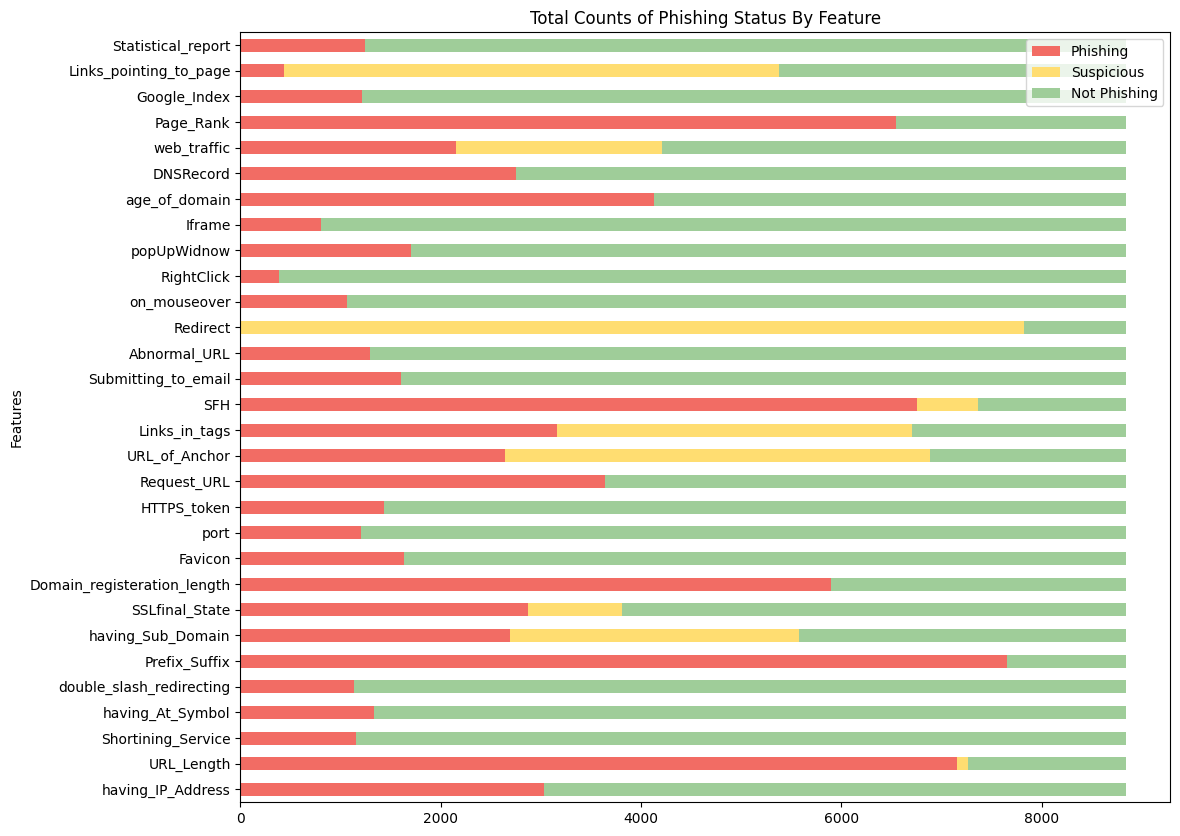

In [8]:
feature_columns = [col for col in df.columns if col != 'Result']

sums= {}

for col_name in feature_columns:
    value_counts = df[col_name].value_counts()

    sums[col_name] = {
        'Phishing': value_counts.get(-1),
        'Suspicious': value_counts.get(0),
        'Not Phishing': value_counts.get(1)
    }

binary_summary = pd.DataFrame(sums).T

colors = ["#F26C64", "#FFDD71", "#9FCD99"]

binary_summary.plot(
    kind='barh',
    stacked=True,
    figsize=(12,10),
    color=colors
)

plt.ylabel("Features")
plt.title("Total Counts of Phishing Status By Feature")
plt.show()

This graph shows the prevalence of phishing, not phishing, and suspicious in each feature. This highlights that most of URL's did not meet the threshold to be marked for phishing among most features. The highest prevalence of flagged phishing occured in page_Rank, SFH, domain_registeration_length, prefix_suffix, and url_length.

Binary predictor columns: Index(['having_IP_Address', 'Shortining_Service', 'having_At_Symbol',
       'double_slash_redirecting', 'Prefix_Suffix',
       'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token',
       'Request_URL', 'Submitting_to_email', 'Abnormal_URL', 'on_mouseover',
       'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord',
       'Page_Rank', 'Google_Index', 'Statistical_report'],
      dtype='object')
Chi-Square Results (Sorted by Chi2)
                        feature         chi2        p_value
4                 Prefix_Suffix  1100.431154  2.661803e-241
9                   Request_URL   586.300760  1.597900e-129
5   Domain_registeration_length   469.643493  3.831310e-104
19                 Google_Index   160.529368   8.669396e-37
16                age_of_domain   117.977410   1.753740e-27
18                    Page_Rank    94.665561   2.254272e-22
0             having_IP_Address    71.081862   3.427062e-17
17                    DNSRecor

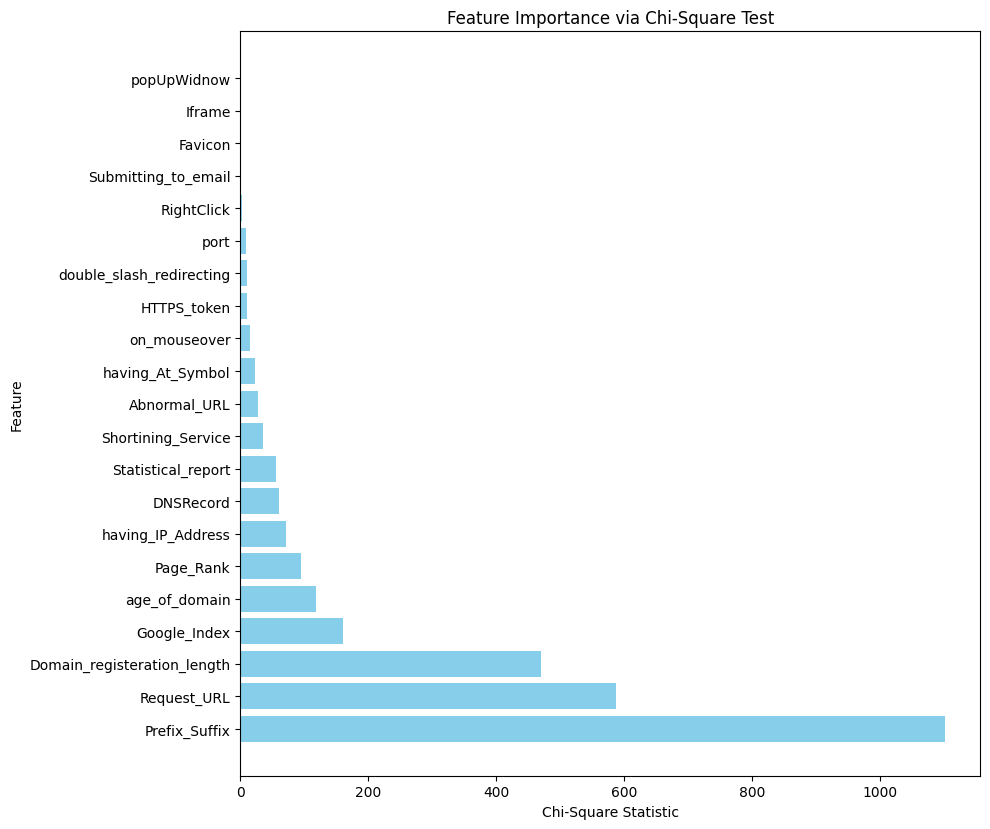

In [9]:
binary_cols = df.drop(columns=suspicious_cols + ['Result']).columns

print("Binary predictor columns:", binary_cols)

chi_results = []

for col in binary_cols:
    contingency = pd.crosstab(df[col], df['Result'])
    chi2, p, dof, expected = chi2_contingency(contingency)
    chi_results.append({
        "feature": col,
        "chi2": chi2,
        "p_value": p
    })

chi_df = pd.DataFrame(chi_results).sort_values("chi2", ascending=False)

print("Chi-Square Results (Sorted by Chi2)")
print(chi_df)

plt.figure(figsize=(10, len(chi_df)*0.4))
plt.barh(chi_df["feature"], chi_df["chi2"], color="skyblue")
plt.xlabel("Chi-Square Statistic")
plt.ylabel("Feature")
plt.title("Feature Importance via Chi-Square Test")
plt.tight_layout()
plt.show()


The Chi-Square statistic measures how strongly each feature is associated with the target class (Phishing vs. Not Phishing). Features with more than two target categories (Suspicious = 0) cannot be directly included in a standard Chi-Square test designed for binary classification. A higher Chi-Square value indicates that the feature is more effective at distinguishing between classes. This clearly shows that prefix_suffix and request_url are the most associated with the target class, meaning that this could be an important focus on ML analysis. The features popupWidnow, iFrame, Favicon, and Submitting_to_email shows little to no strength associated with the target class.